#### Housing Prices

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

#### Imports

In [2]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# sklearn regressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV


Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

#### Exploratory Analysis
 - Context of Data
 - Start with Basics
 - Plot Numerical Distributions
 - Plot Categorical Distributions
 - Plot Segmentations
 - Study Correlations

In [20]:
df = pd.read_csv('data/MelbourneHousingLess.csv')
df.shape

(63023, 13)

In [25]:
df.describe()

,rooms,price,postcode,propertycount,distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [27]:
df.loc[np.where(df.price.isna())].tail(20)

,suburb,address,rooms,type,price,method,seller_g,date,postcode,regionname,propertycount,distance,council_area
62899,St Kilda,17/1 St Kilda Rd,2,u,NaN,SP,McGrath,30/12/2017,3182,Southern Metropolitan,13240,5.0,Port Phillip City Council
62910,Sunbury,52 Station St,3,h,NaN,W,YPA,30/12/2017,3429,Western Metropolitan,14092,31.7,Hume City Council
62935,Taylors Lakes,11 Nerida Ct,4,h,NaN,SP,Barry,30/12/2017,3038,Western Metropolitan,5336,15.5,Brimbank City Council
62939,Thomastown,3 Chesney Ct,3,h,NaN,W,LJH,30/12/2017,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
62944,Thomastown,7 Yilleen Cl,4,h,NaN,SP,Barry,30/12/2017,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
62947,Thornbury,108/630 High St,2,u,NaN,SN,Jellis,30/12/2017,3071,Northern Metropolitan,8870,7.0,Darebin City Council
62954,Toorak,16/425 Toorak Rd,2,u,NaN,PI,Jellis,30/12/2017,3142,Southern Metropolitan,7217,4.1,Stonnington City Council
62959,Vermont South,235 Hawthorn Rd,4,h,NaN,PI,Ray,30/12/2017,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
62969,Wantirna South,7 Sally Cl,5,h,NaN,S,Fletchers,30/12/2017,3152,Eastern Metropolitan,7082,14.7,Knox City Council
62970,Watsonia North,151 Cameron Pde,3,h,NaN,PI,Barry,30/12/2017,3087,Northern Metropolitan,1442,14.5,Banyule City Council


In [26]:
df.head(30)

,suburb,address,rooms,type,price,method,seller_g,date,postcode,regionname,propertycount,distance,council_area
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [22]:
 for text in [(col + ' : ' + str(len(df[col].unique()))) for col in df.columns]:
        print(text)

suburb : 380
address : 57754
rooms : 14
type : 3
price : 3418
method : 9
seller_g : 476
date : 112
postcode : 225
regionname : 8
propertycount : 368
distance : 180
council_area : 34


In [24]:
df.isna().any()

suburb           False
address          False
rooms            False
type             False
price             True
method           False
seller_g         False
date             False
postcode         False
regionname       False
propertycount    False
distance         False
council_area     False
dtype: bool

In [19]:
df.yr_built

0           NaN
1           NaN
2        1900.0
3           NaN
4        1900.0
5           NaN
6        2014.0
7        2006.0
8        1900.0
9        1900.0
10          NaN
11       1910.0
12       2009.0
13       1860.0
14       1890.0
15          NaN
16          NaN
17          NaN
18       1900.0
19          NaN
20       1925.0
21          NaN
22          NaN
23          NaN
24       2005.0
25       2009.0
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
34827       NaN
34828    1940.0
34829       NaN
34830       NaN
34831    1980.0
34832       NaN
34833       NaN
34834       NaN
34835       NaN
34836    1980.0
34837    2015.0
34838       NaN
34839       NaN
34840       NaN
34841    1999.0
34842    1995.0
34843    1949.0
34844       NaN
34845    2009.0
34846       NaN
34847    2016.0
34848       NaN
34849    2012.0
34850    2016.0
34851       NaN
34852       NaN
34853    2018.0
34854    2000.0
34855       NaN
34856    1930.0
Name: yr_built, Length: 

In [18]:
len(df)

34857

In [ ]:
g = sns.jointplot("total_bill", "tip", data=tips, height=5, ratio=3, color="g")
g = sns.pairplot(df, vars=["height"], hue = 'gender', height=6, aspect=1.5)

In [6]:
def label_uncap (string, dict):
    S = []   
    for (i,c) in enumerate(string): 
        if not i:
            sub = c.lower(); c = ''; prv_upr = True
        else:
            if c.isupper():
                    if prv_upr:
                        prv_upr = True
                    else:
                        S.append(sub); sub = c.lower() ; c = ''; prv_upr = True
            else:
                prv_upr = False                
            sub += c.lower()
        if (i + 1 == len(string)):  
            S.append(sub)
        for (i, s) in enumerate(S):
            if s in dict:
                S[i] = dict[s]     
    return '_'.join(S)

In [7]:
abr = {'year':'yr', 'month':'mh', 'day':'dy', 'week':'wk',
      'unique':'uqe', 'time':'tme', 'taxi':'txi', 'in':'in_','weather':'whr',
      'delay':'dly', 'code':'cde', 'cancelled':'cnl', 'cancellation':'cnl',
      'c':'crs','r':'','s':'','a':'','n':'nas'}

In [21]:
df.columns = [label_uncap(col,abr) for col in df.columns]

In [6]:
df.head()

,yr,mh,dayof_mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,...,txi_in_,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
df.columns

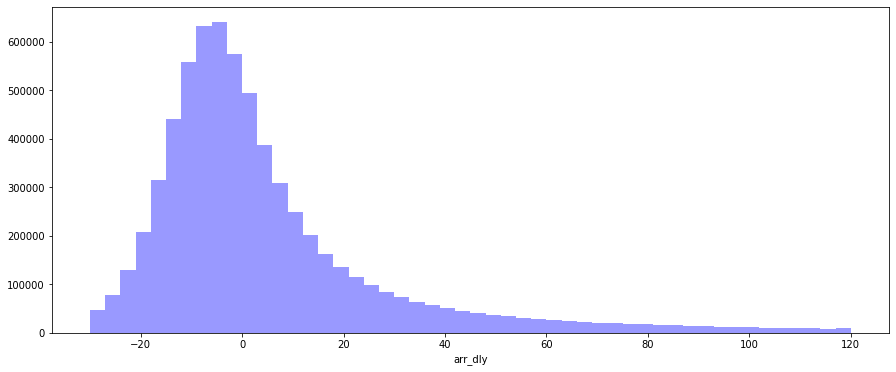

In [22]:
# plot continous arrival delay, drop nan values due to cancel or diverted
x = df.arr_dly.dropna()
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(x[(x >= -30) & (x <= 120)], color="b", kde = False,  ax=ax)
plt.show()

#### Data Cleaning
 - Remove Unwanted observations
 - Fix Structural Errors
 - Filter Unwanted Outliers
 - Handle Missing Data

In [7]:
dfc = df.drop(['yr', 'dayof_mh', 'tail_num'],  axis=1)
dfc.cnl_cde = dfc.cnl_cde.fillna(value='N')
dfc = dfc.fillna(value=0)

In [14]:
dff = dfc.drop(drop1, axis=1)

#### Feature Engineering
 **transform target**
 - Target "late" changed to binary based upon current 15 minute standard
 
**Infuse Domain Knowledge**
  - flight number not necessary as feature.  Flight is going from "origin" to "destination" at "scheduled time".  variance captured in other features. 
  - flight volume varies significantly based upon day of week and time of day.  There are definite peak times for business travelers
  
  - feature the scheduled duration / distance with scaled to standard.  The flight time between between airports is  
 
**Create Interaction Features**
- assigning fault to carrier or system correlates result to "carrier" feature or features that define "flight" 
 
**Combine Sparse Classes**


**Add Dummy Variables**

**Remove Unused Features**
 
 
 

In [18]:
dfc.columns

Index(['mh', 'dy_of_wk', 'dep_tme', 'crsdep_tme', 'arr_tme', 'crsarr_tme',
       'uqe_carrier', 'flight_num', 'actual_elapsed_tme', 'crselapsed_tme',
       'air_tme', 'arr_dly', 'dep_dly', 'origin', 'dest', 'distance',
       'txi_in_', 'txi_out', 'cnl', 'cnl_cde', 'diverted', 'carrier_dly',
       'whr_dly', 'nasdelay', 'security_dly', 'late_aircraft_dly'],
      dtype='object')

In [ ]:
['mh', 'dy_of_wk', 'dep_tme', 'crsdep_tme', 'arr_tme', 'crsarr_tme',
       ,', 


In [ ]:
# preprocess

grp_ord = ['crsdep_tme','crsarr_tme', 'dep_dly' ]
rnk_ord = ['mh', 'dy_of_wk', 'distance', 'uqe_carrier']
unq_dum = ['origin', 'dest']
nne =     ['diverted', 'cnl',]
new =     ['fault', ]

drp = ['dep_tme', 'carrier_dly', 'whr_dly', 'nasdelay', 'security_dly', 'late_aircraft_dly', 'cnl_cde',  'txi_in_',
       'txi_out',  'flight_num', 'actual_elapsed_tme', 'crselapsed_tme', 'air_tme', 'arr_dly', 'dep_dly']

dummies = ['flight_num', 'uqe_carrier', 'origin', 'dest']           
# scale 
nos = ['diverted', 'cnl', ]
std = 
rbt =         


In [9]:
dfc.groupby('dest').arr_dly.mean().describe()

count    304.000000
mean       7.366990
std        4.420851
min       -7.081081
25%        5.080639
50%        7.573907
75%        9.549675
max       28.901309
Name: arr_dly, dtype: float64

In [10]:
dfc.groupby('origin').dep_dly.mean().describe()

count    303.000000
mean       7.867873
std        4.889440
min       -6.132576
25%        5.576504
50%        8.055379
75%       10.199482
max       27.371991
Name: dep_dly, dtype: float64

In [41]:
dfc.txi_out[dfc.cnl == 0].describe()

count    6.872294e+06
mean     1.645279e+01
std      1.133228e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.400000e+01
75%      1.900000e+01
max      4.290000e+02
Name: txi_out, dtype: float64

In [47]:
no_cnl_dvd =  set(range(len(dfc))) - set(np.where(dfc.cnl == 1)[0]) - set(np.where(dfc.diverted == 1)[0])

In [50]:
dfc.loc[no_cnl_dvd][dfc.txi_out == 0].head()

C:\Users\chuck\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,actual_elapsed_tme,crselapsed_tme,...,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly,late
184709,1,4,2030.0,2025,2118.0,2123,OO,5798,48.0,58.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
185531,1,5,936.0,940,1029.0,1040,OO,3674,53.0,60.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
323747,1,6,1142.0,1142,1336.0,1351,EV,4178,54.0,69.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
324940,1,4,1043.0,1008,1321.0,1234,EV,4220,98.0,86.0,...,0.0,0,N,0,35.0,0.0,12.0,0.0,0.0,1
326663,1,5,1315.0,1315,1501.0,1512,EV,4279,46.0,57.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
len(dfc.flight_num.unique())

7539

In [30]:
dfc['late'] = np.where(dff.arr_dly >= 15, 1, 0)+ dfc.cnl + dfc.diverted




In [31]:
dfc.head()

,mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,actual_elapsed_tme,crselapsed_tme,...,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly,late
0,1,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,...,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
1,1,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,...,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
2,1,4,628.0,620,804.0,750,WN,448,96.0,90.0,...,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
3,1,4,926.0,930,1054.0,1100,WN,1746,88.0,90.0,...,7.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
4,1,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1


In [28]:
dfc.groupby('mh')[df.late == 1].count()

AttributeError: 'DataFrame' object has no attribute 'late'

In [26]:
dfc.distance.max()

4962

In [20]:
dff.late = dff.late + dfc.cnl + dfc.diverted

In [25]:
2467 / 60

41.11666666666667

In [21]:
dff.late.unique()

array([0, 1], dtype=int64)

In [35]:
np.where(dfc.cnl == 1)

(array([    178,     373,     399, ..., 7009564, 7009565, 7009648],
       dtype=int64),)

In [39]:
dff.loc[np.where(dfc.cnl == 1)].head()

,arr_dly,dep_dly,crr_dly,whr_dly,nas_dly,sty_dly,lte_act_dly,late
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
dff = dfc.assign(all_delay=lambda df: df.Length*df.Height) 

In [ ]:
df['all_delay'] = df.carrierdelay + df.weatherdelay +  df.nasdelay + df.securitydelay + df.lateaircraftdelay

In [ ]:
df[]

In [ ]:
est_knn = KNeighborsRegressor()
est_rft = RandomForestRegressor(random_state = 1)
est_knn = KNeighborsRegressor()
est_rdg = Ridge(random_state=1)
est_lso = Lasso(random_state=1)
est_svr = SVR()
est_dtr = DecisionTreeRegressor()

#### Algorithm Selection Cross Value

#### Hyperparameter Selection

#### Model Training